<a href="https://colab.research.google.com/github/Ziedny28/PCVK-Ganjil-2023/blob/main/week-06/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


In [96]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
lena = cv.imread('/content/drive/MyDrive/Colab Notebooks/Kampus-PCVK/Datas/Images/lena.jpg')

## Nomor 3: Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)


In [128]:
def generate_rgb_histograms(image,suptitle='Histogram RGB Plot'):

  # Menghitung tinggi, lebar, dan kedalaman citra.
  height, width, depth = np.shape(image)

  # Membuat array untuk menyimpan histogram red, green, dan blue.
  blue = [0] * 256
  green = [0] * 256
  red = [0] * 256

  # Menghitung histogram red, green, dan blue.
  for y in range(0, height):
    for x in range(0, width):
      blue[image[y][x][0]] += 1
      green[image[y][x][1]] += 1
      red[image[y][x][2]] += 1

  # Membuat array untuk menyimpan nama-nama bin.
  names = np.arange(256)

  # Membuat plot histogram RGB.
  fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
  fig.suptitle(suptitle)
  fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

  axs[0].bar(names, red, color='red')
  axs[1].bar(names, green, color='green')
  axs[2].bar(names, blue, color='blue')

  # Menampilkan plot histogram RGB.
  plt.show()

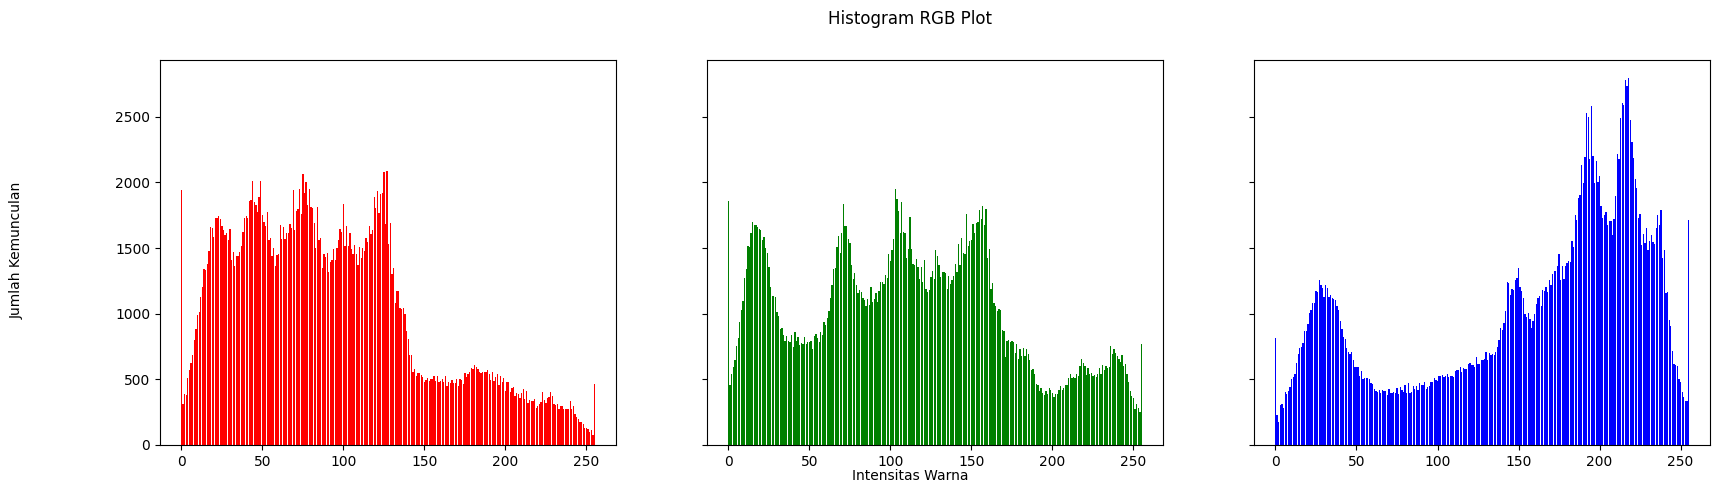

In [129]:
generate_rgb_histograms( cv.cvtColor(lena,cv.COLOR_BGR2RGB))

## Nomor 4: Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

Untuk hasilnya sama, namun tidak perlu mengubah dari bgr ke rgb

In [100]:
def generate_histograms(image):

  # Menghitung histogram red.
  histogram_red = cv.calcHist([image], [0], None, [256], [0, 255])

  # Menghitung histogram green.
  histogram_green = cv.calcHist([image], [1], None, [256], [0, 255])

  # Menghitung histogram blue.
  histogram_blue = cv.calcHist([image], [2], None, [256], [0, 255])

  # Menampilkan histogram red.
  plt.plot(histogram_red)
  plt.xlabel("Nilai pixel red")
  plt.ylabel("Jumlah kemunculan")
  plt.show()

  # Menampilkan histogram green.
  plt.plot(histogram_green)
  plt.xlabel("Nilai pixel green")
  plt.ylabel("Jumlah kemunculan")
  plt.show()

  # Menampilkan histogram blue.
  plt.plot(histogram_blue)
  plt.xlabel("Nilai pixel blue")
  plt.ylabel("Jumlah kemunculan")
  plt.show()



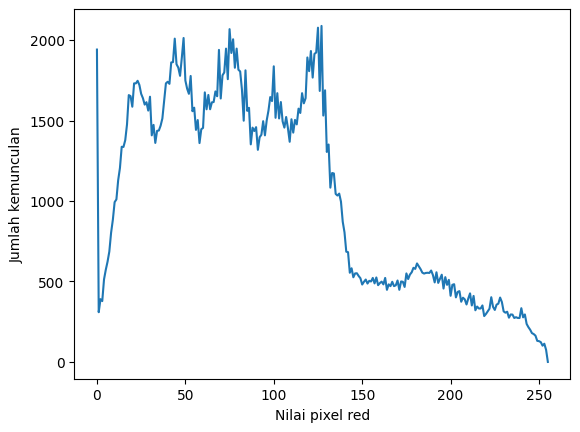

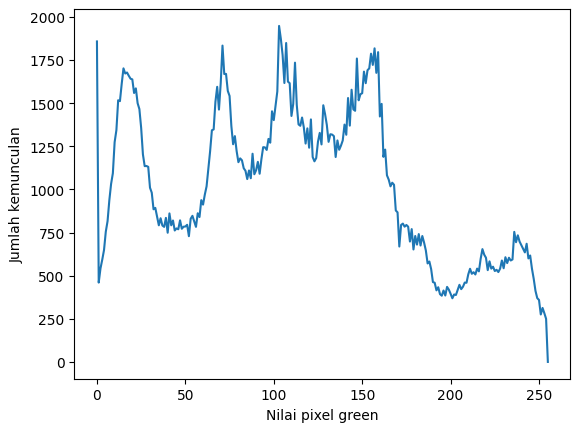

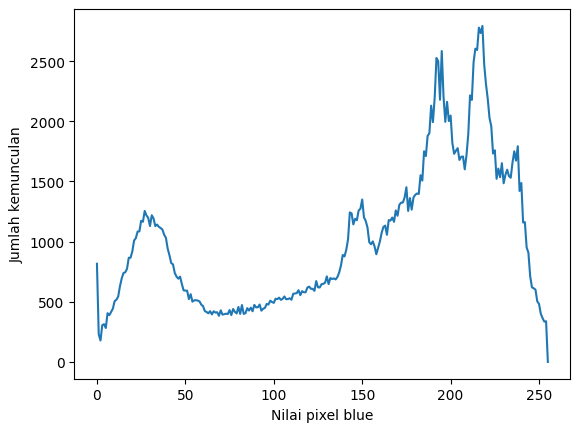

In [101]:
image = lena
generate_histograms(image)

## Nomor 5: Buatlah histogram citra seperti output histogram equalization dan juga tampilangambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [102]:
lena_lc = cv.imread('/content/drive/MyDrive/Colab Notebooks/Kampus-PCVK/Datas/Images/lena_lc.jpg')

In [103]:
def histogram_equalization(image):


  # Konversi citra RGB ke array Numpy.
  image_array = np.asarray(image)

  # Menghitung histogram ternormalisasi akumulatif.
  histogram_array = np.bincount(image_array.flatten(), minlength=256)
  histogram_array = histogram_array / np.sum(histogram_array)
  chistogram_array = np.cumsum(histogram_array)

  # Membuat tabel pencarian transformasi.
  transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

  # Melakukan transformasi.
  eq_img_array = np.reshape(np.asarray([transform_map[p] for p in image_array.flatten()]), image_array.shape)

  # Konversi array Numpy kembali ke citra RGB.
  equalized_image = eq_img_array.astype(np.uint8)

  return equalized_image

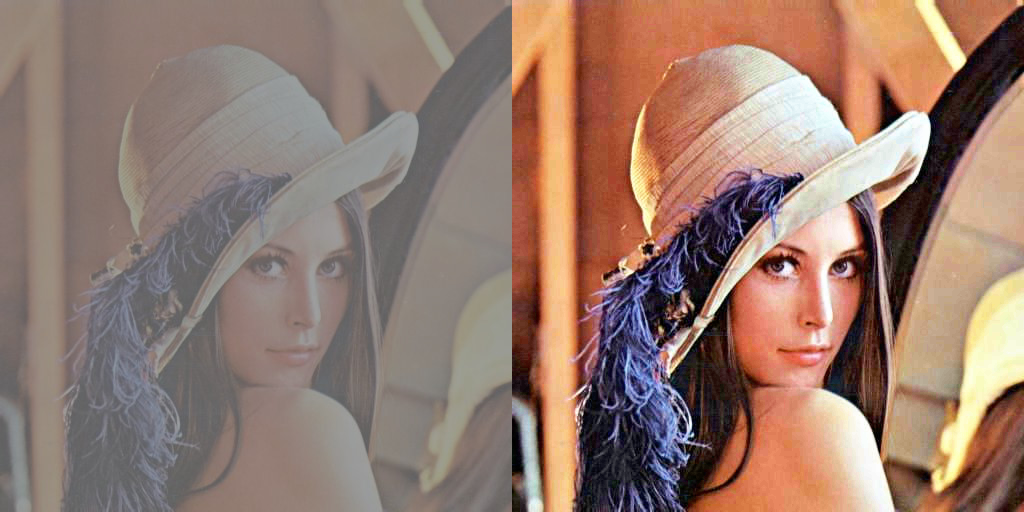

In [104]:
equalized_image = histogram_equalization(lena_lc)

final_frame = cv.hconcat((lena_lc, equalized_image))

cv2_imshow(final_frame)

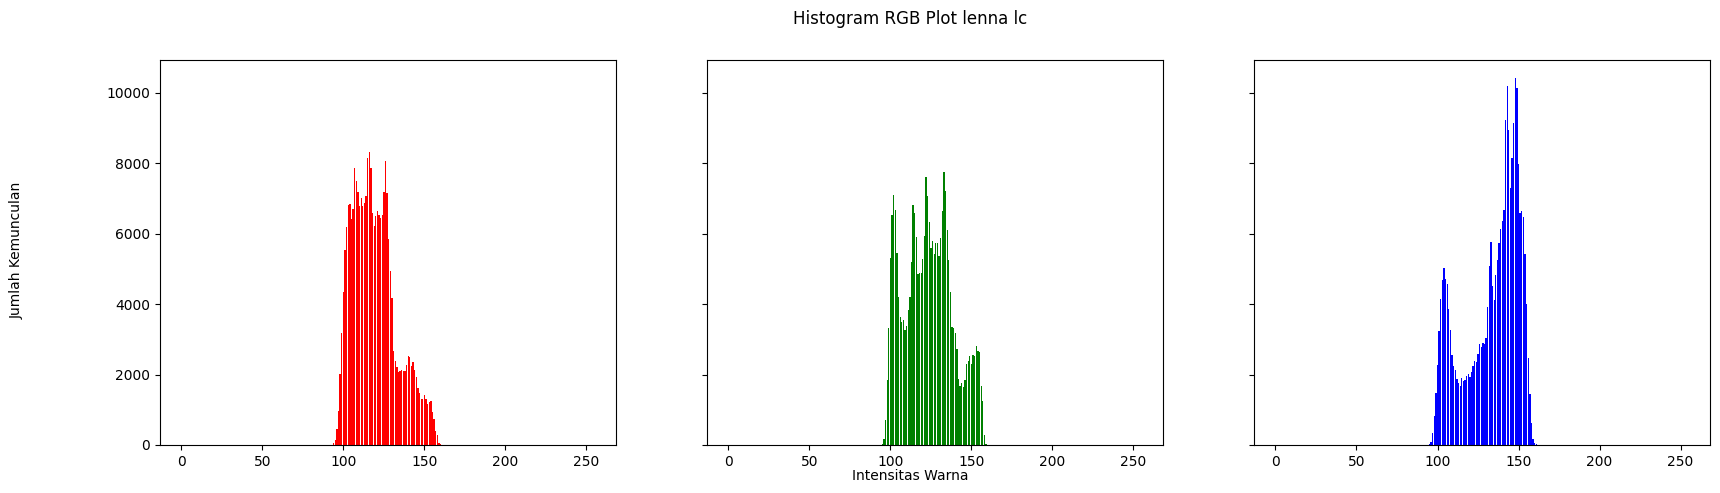

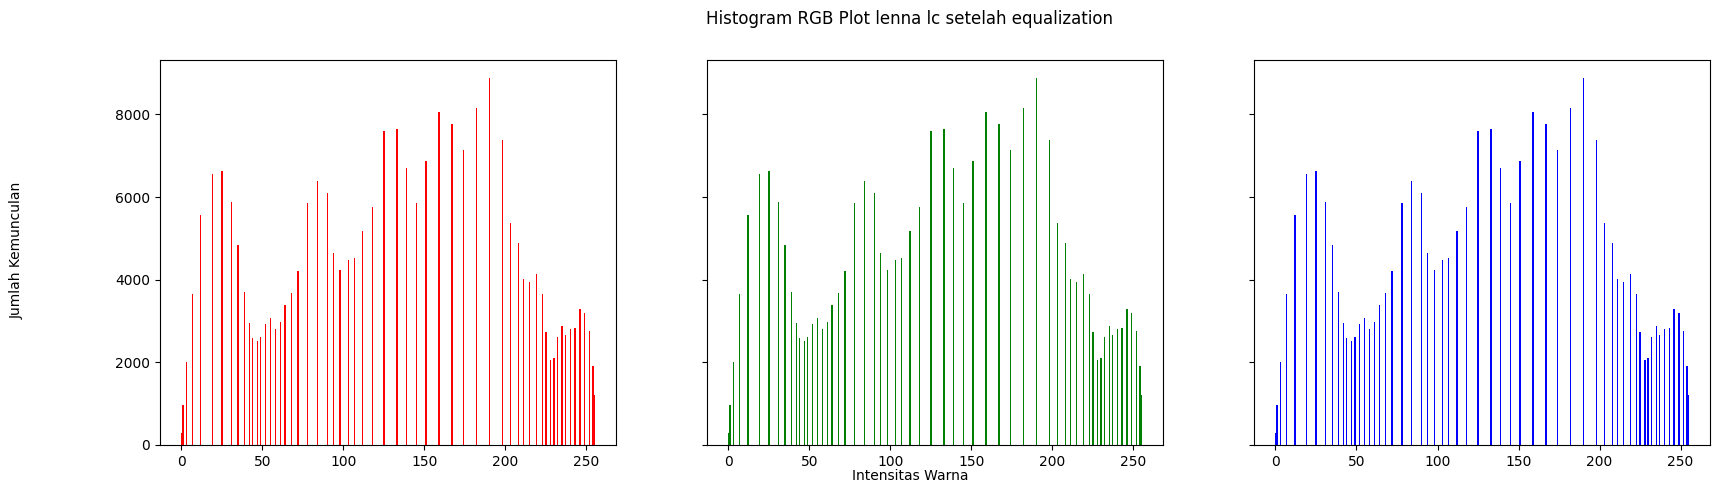

In [130]:
generate_rgb_histograms( cv.cvtColor(lena_lc,cv.COLOR_BGR2RGB),'Histogram RGB Plot lenna lc')
generate_rgb_histograms( cv.cvtColor(equalized_image,cv.COLOR_BGR2RGB), 'Histogram RGB Plot lenna lc setelah equalization')

## Nomor 6: Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

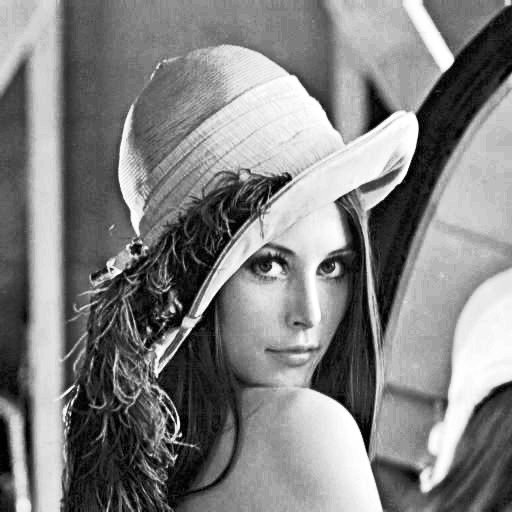

In [126]:
cv2_imshow(equalized_image)